In [92]:
import pandas as pd
import numpy as np

In [93]:
df = pd.read_csv('calories_burn.csv')

In [94]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


Up till now I have two observations which are

1- I dont need userid column, i can drop it safely without affecting the model later

2- I need to encode the gender column so the Dtype is changed into meaningfull numbers\

I will encode the gender column later after i do some plot analysis.

In [96]:
df.drop('User_ID', axis=1, inplace=True)

In [97]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190,94,29,105,40.8,231
1,female,20,166,60,14,94,40.3,66
2,male,69,179,79,5,88,38.7,26
3,female,34,179,71,13,100,40.5,71
4,female,27,154,58,10,81,39.8,35


In [98]:
df.isna().sum()

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [99]:
df['Calories'].value_counts()

Calories
7      161
13     142
12     137
11     137
17     136
      ... 
270      1
280      1
289      1
258      1
287      1
Name: count, Length: 277, dtype: int64

In [100]:
df.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


After looking at the dataframe description, i notice that the Std is somewhat high in some of the columns and especially high in calories column.
So now i know i need to apply stand scaling to the dataset

In [101]:
df['Gender'].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

Female to Male ratio looks balanced , no need to stratify or resample it.

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

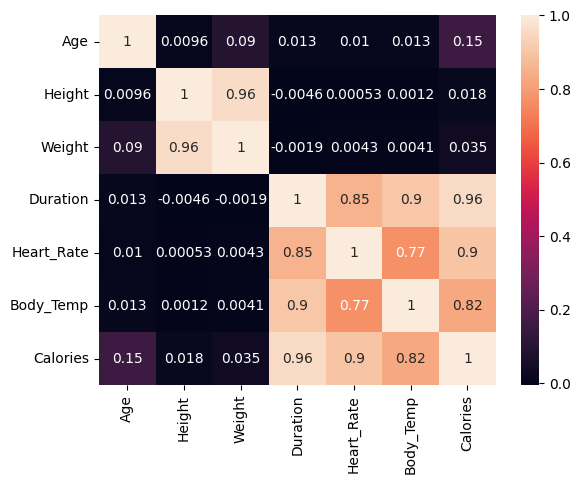

In [103]:
sns.heatmap(df[['Age','Height','Weight','Duration','Heart_Rate','Body_Temp','Calories']].corr(), annot=True)

From the heatmap of correlation i notice that some of the features have high positive correlation with outcome, and some other features are corellated to each other aswell , such as body temp with heart rate

From the highly correlated features i have to drop one of them to avoid [multicollinearity](https://www.investopedia.com/terms/m/multicollinearity.asp)

Weight and height are highly correlated meaning one of them is redundant , since weight is more relevant in this situation i will drop height column

And since body temp and heart rate is highly correlated aswell but heart rate is more strongly correlated to calories burnt , I'll drop body temp and keep heart rate

In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assume X is your feature matrix (excluding the target variable 'Calories')
VifTestData = df.drop(columns=['Calories','Gender','Body_Temp','Height'])

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = VifTestData.columns
vif_data["VIF"] = [variance_inflation_factor(VifTestData.values, i) for i in range(VifTestData.shape[1])]

print(vif_data)


      Feature        VIF
0         Age   7.299706
1      Weight  24.169620
2    Duration   7.320861
3  Heart_Rate  42.760253


In [105]:
NonMcDf = df.drop(columns=['Body_Temp','Height'])
# I will be using this DF for Linear Regression & SVM
# Decision Tree & Random Forest can handle multicollinearity so i will be using the normal dataframe with them.

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  int64  
 3   Weight      15000 non-null  int64  
 4   Duration    15000 non-null  int64  
 5   Heart_Rate  15000 non-null  int64  
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 937.6+ KB


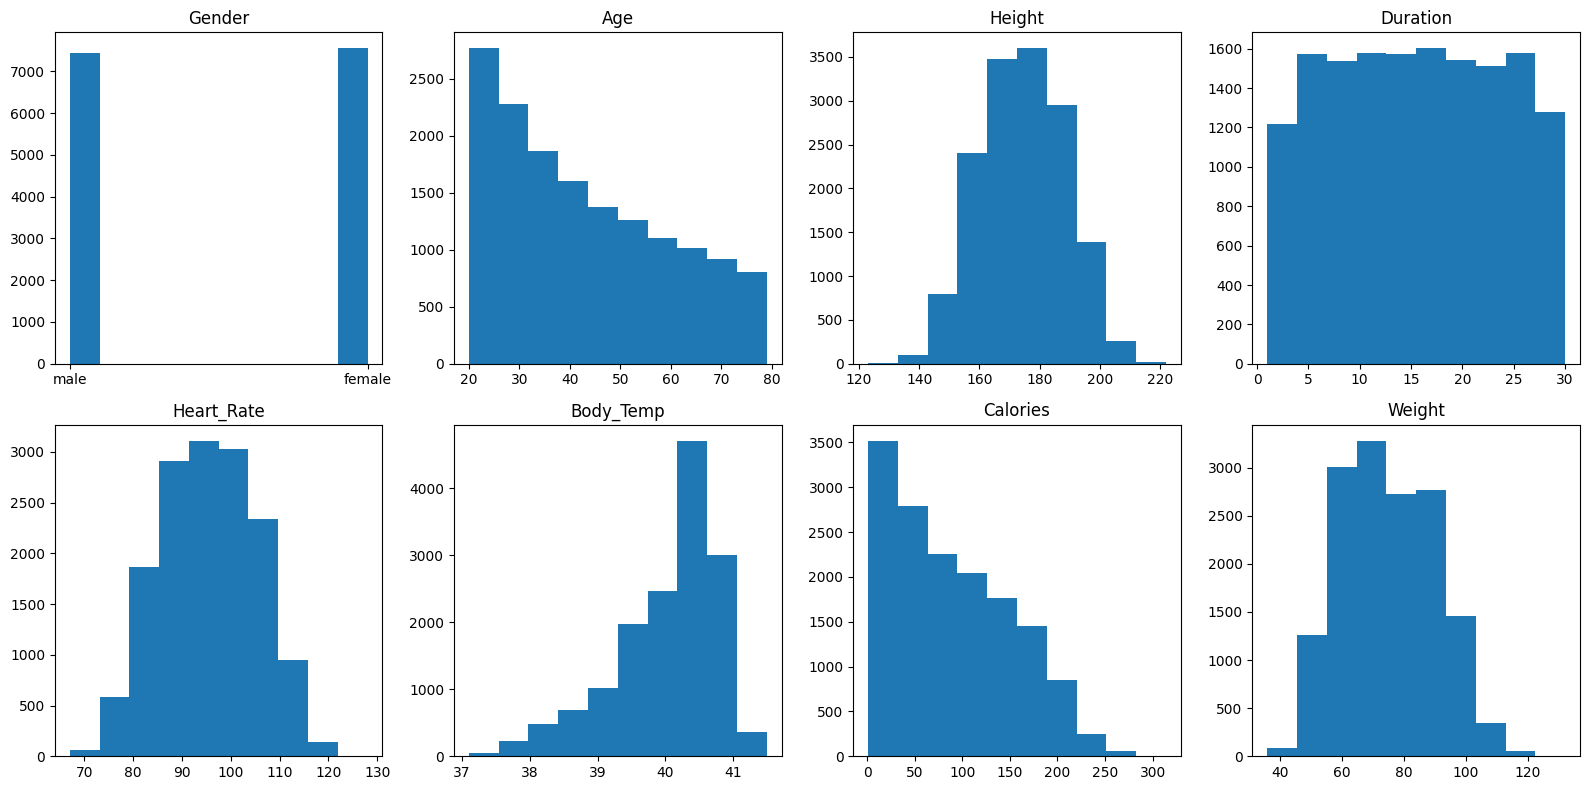

In [107]:
fig,ax = plt.subplots(2,4, figsize=(16,8))

ax[0,0].title.set_text('Gender') 
ax[0,0].hist(df['Gender'])

ax[0,1].title.set_text('Age') 
ax[0,1].hist(df['Age'])

ax[0,2].title.set_text('Height') 
ax[0,2].hist(df['Height'])

ax[0,3].title.set_text('Duration') 
ax[0,3].hist(df['Duration'])

ax[1,0].title.set_text('Heart_Rate') 
ax[1,0].hist(df['Heart_Rate'])

ax[1,1].title.set_text('Body_Temp') 
ax[1,1].hist(df['Body_Temp'])

ax[1,2].title.set_text('Calories') 
ax[1,2].hist(df['Calories'])

ax[1,3].title.set_text('Weight') 
ax[1,3].hist(df['Weight'])

plt.tight_layout()
plt.show()



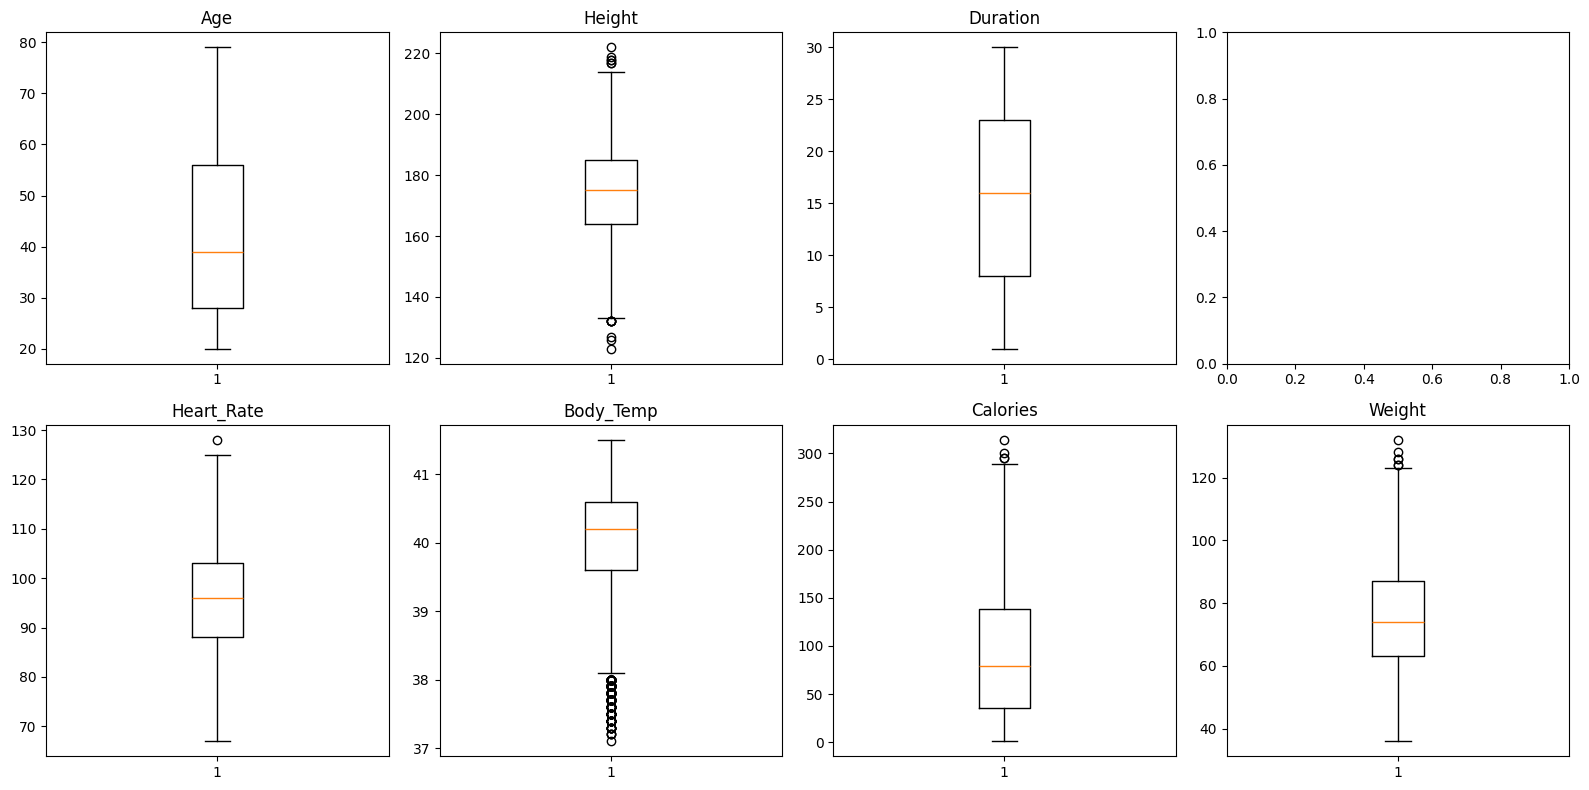

In [108]:
fig,ax = plt.subplots(2,4, figsize=(16,8))

ax[0,0].title.set_text('Age') 
ax[0,0].boxplot(df['Age'])

ax[0,1].title.set_text('Height') 
ax[0,1].boxplot(df['Height'])

ax[0,2].title.set_text('Duration') 
ax[0,2].boxplot(df['Duration'])

ax[1,0].title.set_text('Heart_Rate') 
ax[1,0].boxplot(df['Heart_Rate'])

ax[1,1].title.set_text('Body_Temp') 
ax[1,1].boxplot(df['Body_Temp'])

ax[1,2].title.set_text('Calories') 
ax[1,2].boxplot(df['Calories'])

ax[1,3].title.set_text('Weight') 
ax[1,3].boxplot(df['Weight'])

plt.tight_layout()
plt.show()

OutlierFeatures = ['Body_Temp', 'Weight','Height']


In [109]:
for i in OutlierFeatures:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5*IQR
    Upper_Whisker = Q3 + 1.5*IQR
    featureMedian = df[i].median()
    df.loc[(df[i] < Lower_Whisker) | (df[i] > Upper_Whisker), i] = featureMedian

In [110]:
df.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.472000,74.945800,15.530600,95.518533,40.084867,89.539533
std,16.980264,14.192697,14.999955,8.319203,9.583328,0.692809,62.456978
min,20.000000,133.000000,36.000000,1.000000,67.000000,38.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.700000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,214.000000,123.000000,30.000000,128.000000,41.500000,314.000000


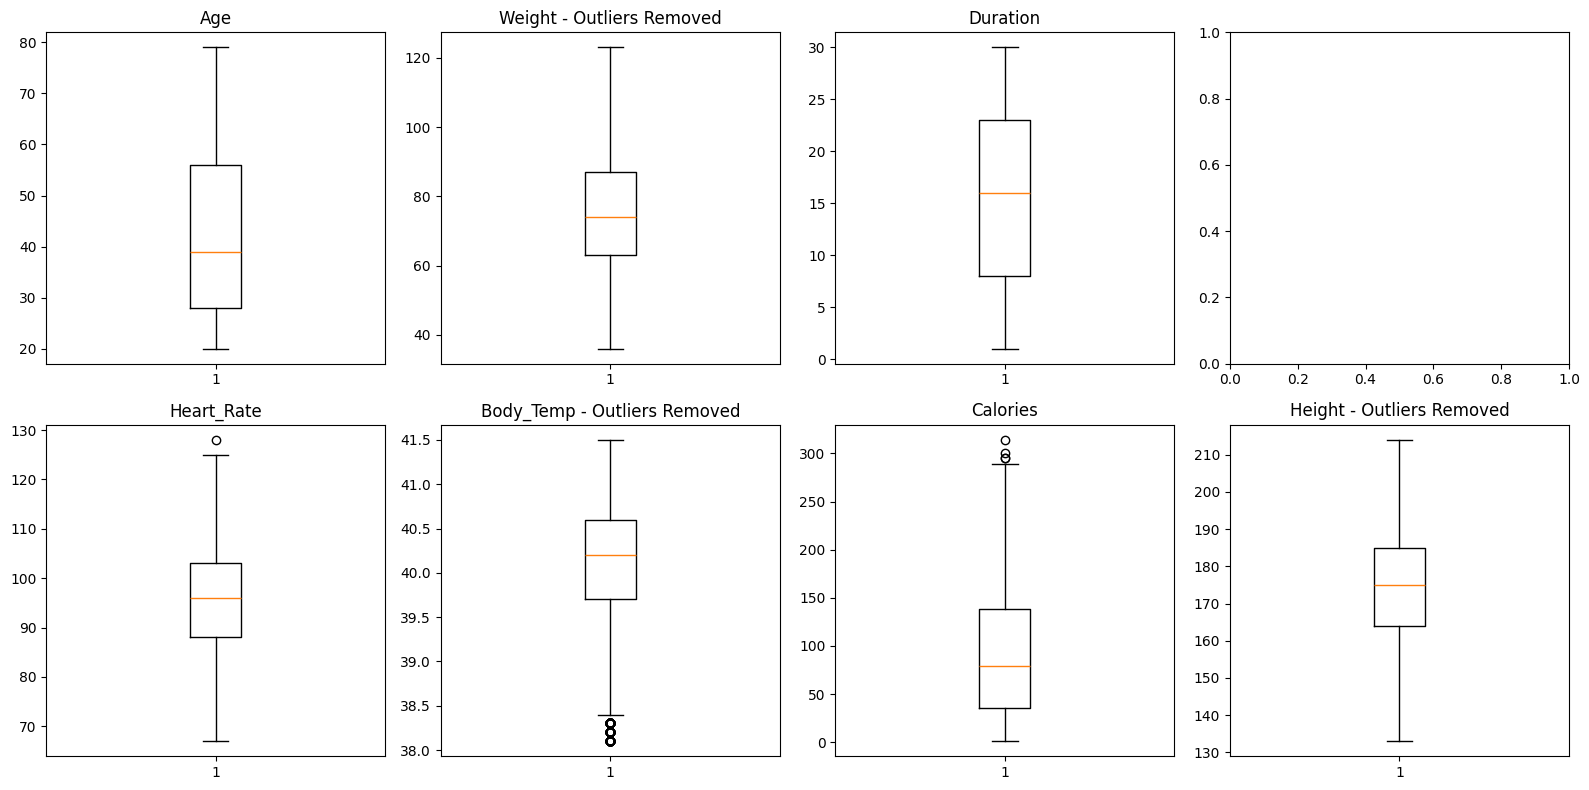

In [111]:
fig,ax = plt.subplots(2,4, figsize=(16,8))

ax[0,0].title.set_text('Age') 
ax[0,0].boxplot(df['Age'])

ax[0,1].title.set_text('Weight - Outliers Removed') 
ax[0,1].boxplot(df['Weight'])

ax[0,2].title.set_text('Duration') 
ax[0,2].boxplot(df['Duration'])

ax[1,0].title.set_text('Heart_Rate') 
ax[1,0].boxplot(df['Heart_Rate'])

ax[1,1].title.set_text('Body_Temp - Outliers Removed') 
ax[1,1].boxplot(df['Body_Temp'])

ax[1,2].title.set_text('Calories') 
ax[1,2].boxplot(df['Calories'])

ax[1,3].title.set_text('Height - Outliers Removed') 
ax[1,3].boxplot(df['Height'])

plt.tight_layout()
plt.show()

In [112]:
df['Gender'] = np.where(df['Gender'] == 'female', 1,0)
df.head()


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190,94,29,105,40.8,231
1,1,20,166,60,14,94,40.3,66
2,0,69,179,79,5,88,38.7,26
3,1,34,179,71,13,100,40.5,71
4,1,27,154,58,10,81,39.8,35


In [113]:
df['Gender'].value_counts()

Gender
1    7553
0    7447
Name: count, dtype: int64

In [114]:
df.describe()


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.503533,42.789800,174.472000,74.945800,15.530600,95.518533,40.084867,89.539533
std,0.500004,16.980264,14.192697,14.999955,8.319203,9.583328,0.692809,62.456978
min,0.000000,20.000000,133.000000,36.000000,1.000000,67.000000,38.100000,1.000000
25%,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.700000,35.000000
50%,1.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.000000,79.000000,214.000000,123.000000,30.000000,128.000000,41.500000,314.000000


In [115]:
from sklearn.preprocessing import StandardScaler
DeviatedFeatures = ['Age','Weight','Height','Duration','Heart_Rate','Calories']
scaler = StandardScaler()

In [116]:
df[DeviatedFeatures] = scaler.fit_transform(df[DeviatedFeatures])
df.describe()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,15000.000000,1.500000e+04
mean,0.503533,3.126388e-17,-5.951980e-16,-3.777719e-16,2.711905e-17,-4.429050e-16,40.084867,-7.898867e-17
std,0.500004,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,0.692809,1.000033e+00
min,0.000000,-1.342179e+00,-2.922164e+00,-2.596481e+00,-1.746692e+00,-2.975948e+00,38.100000,-1.417656e+00
25%,0.000000,-8.710284e-01,-7.378689e-01,-7.964156e-01,-9.052370e-01,-7.845692e-01,39.700000,-8.732627e-01
50%,1.000000,-2.231960e-01,3.720347e-02,-6.305562e-02,5.642555e-02,5.024170e-02,40.200000,-1.687543e-01
75%,1.000000,7.779997e-01,7.418147e-01,8.036425e-01,8.978803e-01,7.807012e-01,40.600000,7.759274e-01
max,1.000000,2.132559e+00,2.785187e+00,3.203730e+00,1.739335e+00,3.389485e+00,41.500000,3.593961e+00


In [117]:
import pickle # saving the model
filename = 'Models\CaloriesBurnScaler.pkl'

with open(filename,'wb') as file:
    pickle.dump(scaler, file)

    print(f'Model has been saved as {filename}')

Model has been saved as Models\CaloriesBurnScaler.pkl


<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
C:\Users\AhmadJerjees\AppData\Local\Temp\ipykernel_17176\3594828958.py:2: SyntaxWarning: invalid escape sequence '\C'
  filename = 'Models\CaloriesBurnScaler.pkl'


In [118]:
df

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,1.484726,1.094120,1.270326,1.619127,0.989404,40.8,2.265002
1,1,-1.342179,-0.596947,-0.996423,-0.183990,-0.158461,40.3,-0.376905
2,0,1.543620,0.319048,0.270290,-1.265861,-0.784569,38.7,-1.017367
3,1,-0.517665,0.319048,-0.263063,-0.304198,0.467647,40.5,-0.296847
4,1,-0.929922,-1.442480,-1.129761,-0.664821,-1.515029,39.8,-0.873263
...,...,...,...,...,...,...,...,...
14995,1,-1.342179,1.305504,0.736973,-0.544614,-0.367164,40.4,-0.713147
14996,1,-0.929922,-0.667408,-0.663077,-1.145653,-1.097623,39.2,-1.065401
14997,1,0.012379,-1.090174,-1.129761,0.056426,-0.575866,40.1,-0.232801
14998,0,2.073665,1.305504,1.470333,-1.626484,-1.201975,38.3,-1.257540


In [119]:
X_nonMc = df.drop(columns=['Calories','Body_Temp','Height'])
X = df.drop('Calories', axis=1)
y = df['Calories']

In [120]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train_nonMc,X_test_nonMc,y_train_nonMc,y_test_nonMc = train_test_split(X_nonMc, y, test_size=0.20, random_state=42)

In [121]:
print(df.shape)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


print(df.shape)
print(f"X_train_nonMc shape: {X_train_nonMc.shape}")
print(f"X_test_nonMc shape: {X_test_nonMc.shape}")

print(f"y_train_nonMc shape: {y_train_nonMc.shape}")
print(f"y_test_nonMc shape: {y_test_nonMc.shape}")


(15000, 8)
X_train shape: (12000, 7)
X_test shape: (3000, 7)
y_train shape: (12000,)
y_test shape: (3000,)
(15000, 8)
X_train_nonMc shape: (12000, 5)
X_test_nonMc shape: (3000, 5)
y_train_nonMc shape: (12000,)
y_test_nonMc shape: (3000,)


First i will start off with linear regression and SVM

In [122]:
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Linear Regression

In [123]:
lr = LinearRegression()
lr.fit(X_train_nonMc, y_train_nonMc)


LinearRegression()

In [124]:

LrPred = lr.predict(X_train_nonMc)
score = metrics.r2_score(y_train_nonMc,LrPred)
score

0.9587786894961366

In [125]:
LrPred1 = lr.predict(X_test_nonMc)
score1 = metrics.r2_score(y_test_nonMc,LrPred1)
score1

0.9588453420774155

In [126]:
import pickle # saving the model
filename = 'Models\CaloriesBurnLrModel.pkl'

with open(filename,'wb') as file:
    pickle.dump(lr, file)

    print(f'Model has been saved as {filename}')

Model has been saved as Models\CaloriesBurnLrModel.pkl


<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
C:\Users\AhmadJerjees\AppData\Local\Temp\ipykernel_17176\1867722424.py:2: SyntaxWarning: invalid escape sequence '\C'
  filename = 'Models\CaloriesBurnLrModel.pkl'


# Support Vector Machine

In [127]:
svmModel = svm.SVR()
svmModel.fit(X_train_nonMc, y_train_nonMc)


SVR()

In [128]:
SvmPred = svmModel.predict(X_train_nonMc)
score = metrics.r2_score(y_train_nonMc,SvmPred)
score

0.9976821703600458

In [129]:
SvmPred1 = svmModel.predict(X_test_nonMc)
score = metrics.r2_score(y_test_nonMc,SvmPred1)
score

0.9977351316549236

In [130]:
import pickle # saving the model
filename = 'Models\CaloriesBurnSvmModel.pkl'

with open(filename,'wb') as file:
    pickle.dump(svmModel, file)

    print(f'Model has been saved as {filename}')

Model has been saved as Models\CaloriesBurnSvmModel.pkl


<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
C:\Users\AhmadJerjees\AppData\Local\Temp\ipykernel_17176\681464729.py:2: SyntaxWarning: invalid escape sequence '\C'
  filename = 'Models\CaloriesBurnSvmModel.pkl'


It looks suspiciously high, i suspect it might be overfitting.

# Decision Trees

In [131]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
DtPred = dt.predict(X_train)
score = metrics.r2_score(y_train,DtPred)
score

1.0

In [132]:
DtPred1 = dt.predict(X_test)
score1 = metrics.r2_score(y_test,DtPred1)
score1

0.9930967692071127

In [133]:
import pickle # saving the model
filename = 'Models\CaloriesBurnDtModel.pkl'

with open(filename,'wb') as file:
    pickle.dump(dt, file)

    print(f'Model has been saved as {filename}')

Model has been saved as Models\CaloriesBurnDtModel.pkl


<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
C:\Users\AhmadJerjees\AppData\Local\Temp\ipykernel_17176\3462358308.py:2: SyntaxWarning: invalid escape sequence '\C'
  filename = 'Models\CaloriesBurnDtModel.pkl'


# Random Forest

In [134]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
RfPred = rf.predict(X_train)
score = metrics.r2_score(y_train,RfPred)
score

0.9996921729454205

In [135]:


RfPred1 = rf.predict(X_test)
score1 = metrics.r2_score(y_test,RfPred1)
score1



0.9981996375165876

In [136]:
import pickle # saving the model
filename = 'Models\CaloriesBurnRfModel.pkl'

with open(filename,'wb') as file:
    pickle.dump(rf, file)

    print(f'Model has been saved as {filename}')

Model has been saved as Models\CaloriesBurnRfModel.pkl


<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
C:\Users\AhmadJerjees\AppData\Local\Temp\ipykernel_17176\3277736591.py:2: SyntaxWarning: invalid escape sequence '\C'
  filename = 'Models\CaloriesBurnRfModel.pkl'
